## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [4]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# TODO: load in excel file "../../data/raw/realestate.xlsx"
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
df = pd.read_excel("../../data/raw/realestate.xlsx")
print(df)



# check how many missing values we have
df.isna().sum()

      No  X2 house age X3 distance to the nearest MRT station  \
0      1          32.0                             "84.87882"   
1      2          19.5                             "306.5947"   
2      3          13.3                             "561.9845"   
3      4          13.3                             "561.9845"   
4      5           5.0                             "390.5684"   
..   ...           ...                                    ...   
409  410          13.7                             "4082.015"   
410  411           5.6                             "90.45606"   
411  412          18.8                             "390.9696"   
412  413           8.1                             "104.8101"   
413  414           6.5                             "90.45606"   

     X4 number of convenience stores  X5 latitude  X6 longitude  \
0                              100.0     24.98298     121.54024   
1                                9.0     24.98034     121.53951   
2                 

No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [6]:
# create dictionary of mappings
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# rename columns
df_rename = df.rename(columns=rename_dict)

# view new columns
df_rename.columns
df_rename

,No,house_age,distance_to_mrt,num_convenience_stores,lat,long,price_unit_area
0,1,32.0,"""84.87882""",100.0,24.98298,121.54024,37.9
1,2,19.5,"""306.5947""",9.0,24.98034,121.53951,42.2
2,3,13.3,"""561.9845""",5.0,24.98746,121.54391,47.3
3,4,13.3,"""561.9845""",5.0,24.98746,121.54391,54.8
4,5,5.0,"""390.5684""",5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,13.7,"""4082.015""",0.0,24.94155,121.50381,15.4
410,411,5.6,"""90.45606""",9.0,24.97433,121.54310,50.0
411,412,18.8,"""390.9696""",7.0,24.97923,121.53986,40.6
412,413,8.1,"""104.8101""",5.0,24.96674,121.54067,52.5


In [7]:
selected = ["lat", "long", "No"]

# TODO: Drop the selected columns 
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_drop = df_rename.drop(columns=['lat', 'long', 'No'])
df_drop

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,32.0,"""84.87882""",100.0,37.9
1,19.5,"""306.5947""",9.0,42.2
2,13.3,"""561.9845""",5.0,47.3
3,13.3,"""561.9845""",5.0,54.8
4,5.0,"""390.5684""",5.0,43.1
...,...,...,...,...
409,13.7,"""4082.015""",0.0,15.4
410,5.6,"""90.45606""",9.0,50.0
411,18.8,"""390.9696""",7.0,40.6
412,8.1,"""104.8101""",5.0,52.5


In [8]:
# remove quotes from sample
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].apply(str).str.strip("\"")

# TODO: convert the "distance_to_mrt" column to the "float" datatype
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].astype(float)
print(df_drop["distance_to_mrt"])

0        84.87882
1       306.59470
2       561.98450
3       561.98450
4       390.56840
          ...    
409    4082.01500
410      90.45606
411     390.96960
412     104.81010
413      90.45606
Name: distance_to_mrt, Length: 414, dtype: float64


In [9]:
# check current "shape" of dataframe
df_drop.shape

(414, 4)

In [16]:
# TODO: Remove missing values from this dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df.dropna(axis= 0, how= "all")

# check shape again
print(df_drop.shape)

(414, 4)


## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [17]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
...
df_drop.describe(include=[np.number])

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
count,403.000000,414.000000,413.000000,414.000000
mean,18.607196,1083.885689,4.283293,37.980193
std,22.656541,1262.109595,5.580361,13.606488
min,0.000000,23.382840,-6.000000,7.600000
25%,8.700000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.450000
75%,28.300000,1454.279000,6.000000,46.600000
max,410.300000,6488.021000,100.000000,117.500000


In [18]:
# notice how the minimum value for "num_convenience_stores" is -6
# how do we have -6 convenience stores? this must be an error, let's remove it

df_outl = df_drop[df_drop.num_convenience_stores >= 0]
df_outl.shape

(412, 4)

In [278]:
# notice how the maximum value for "num_convenience_stores" is 100
# (the median convenice stores is 4, the mean is 4.29, this shows that this is most likely an error)

# TODO: implement this logic in the brackets
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
df_outl = df_outl[df_outl["num_convenience_stores"] <= 100]
df_outl.shape

(412, 4)

In [279]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# let's remove this value
df_outl = df_outl[df_outl.house_age != 410.3]
df_outl.shape

(411, 4)

<Axes: xlabel='price_unit_area', ylabel='Count'>

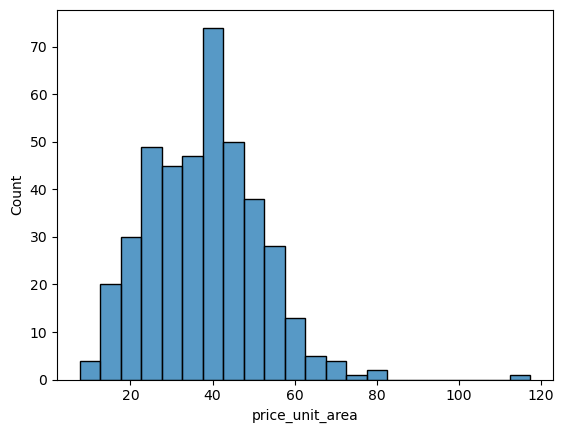

In [280]:
# let's explore our visualizations again, starting with univariate

# TODO : plot histogram of "price_unit_area" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html


# Plot histogram of "price_unit_area"

sns.histplot(df_outl["price_unit_area"])


<Axes: xlabel='house_age', ylabel='Count'>

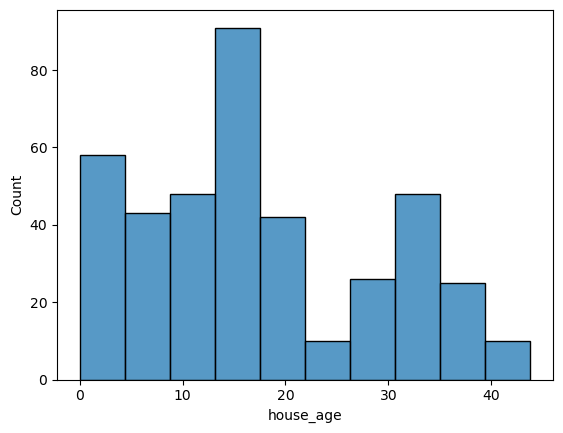

In [281]:
# TODO : plot histogram of "house_age" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["house_age"])

<Axes: xlabel='num_convenience_stores', ylabel='Count'>

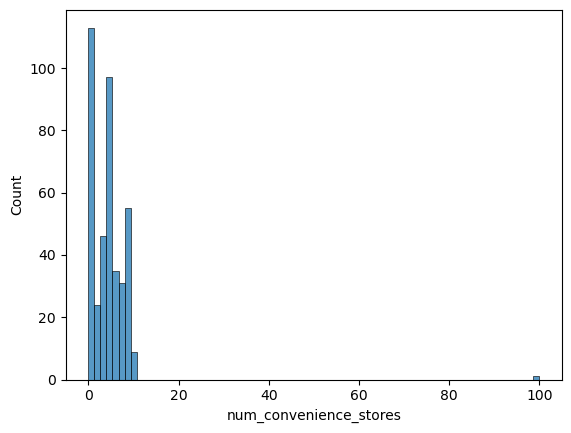

In [282]:
# TODO : plot histogram of "num_convenience_stores" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["num_convenience_stores"])

<Axes: xlabel='distance_to_mrt', ylabel='Count'>

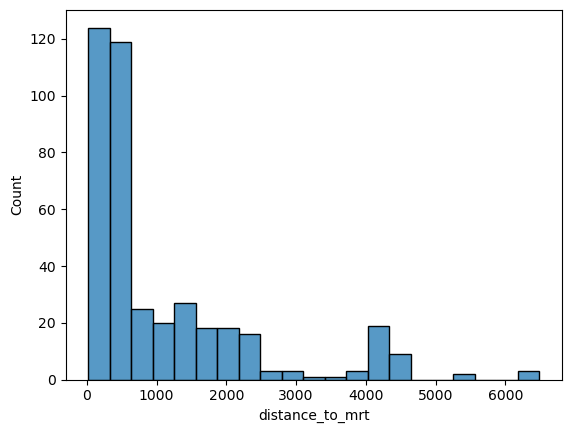

In [283]:
# TODO : plot histogram of "distance_to_mrt" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["distance_to_mrt"])

<Axes: xlabel='house_age', ylabel='price_unit_area'>

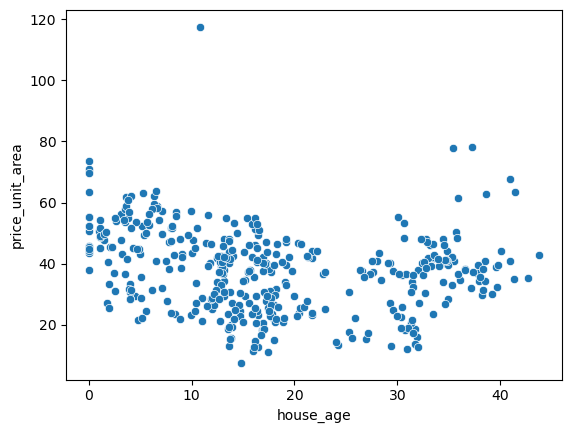

In [284]:
# next we move onto scatter-plots (bi-variate analysis)

# TODO : plot scatter plot of "house_age" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(x="house_age", y="price_unit_area",data=df_outl)

<Axes: xlabel='num_convenience_stores', ylabel='price_unit_area'>

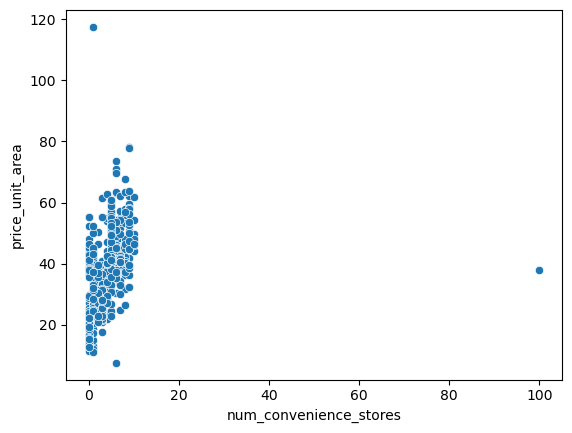

In [285]:
# TODO : plot scatter plot of "num_convenice_stores" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(x="num_convenience_stores", y="price_unit_area",data=df_outl)

<Axes: xlabel='distance_to_mrt', ylabel='price_unit_area'>

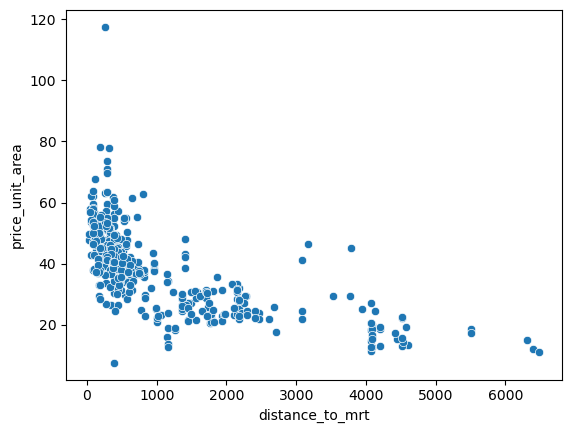

In [286]:
# TODO : plot scatter plot of "distance_to_mrt" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(x="distance_to_mrt", y="price_unit_area",data=df_outl)

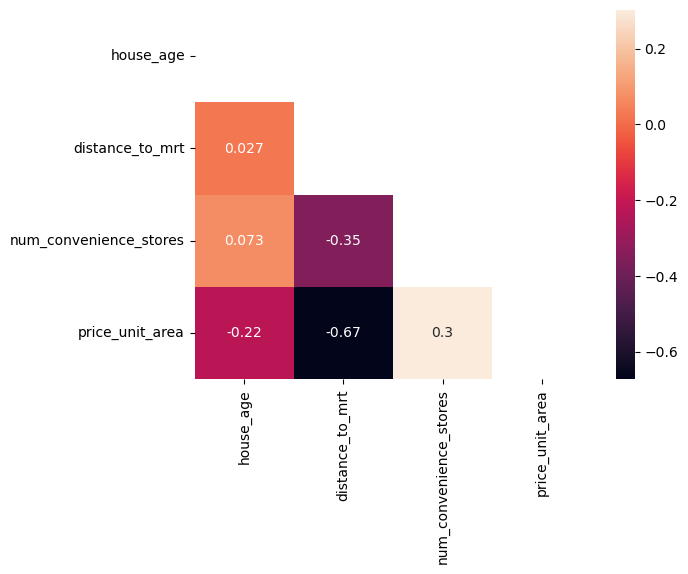

In [287]:
mask = np.triu(np.ones_like(df_outl.corr(), dtype=bool))

sns.heatmap(df_outl.corr(), annot=True, mask=mask)
plt.show()

In [288]:
# save data for later modeling
df_drop.to_csv("../../data/processed/tpdata.csv", index=False)